###                                                    Exploratory Data Analysis on IPL Dataset

##### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





##### Reading the csv file

In [2]:
df = pd.read_csv("C:\\Users\\sarve\\Downloads\\Indian Premier League\\matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


While working with this dataset I found that there were 2 different teams naming **Rising Pune Supergiants** & **Rising Pune Supergiant**
so I replaced one with the other in 4 columns
Also there were 2 cities **Bengaluru** & **Bangalore** so I replaced **Bengaluru** with **Bangalore**

In [3]:
df['team1'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)
df['team2'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)
df['toss_winner'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)
df['winner'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)
df['city'].replace({'Bengaluru':'Bangalore'}, inplace=True)

To know no of rows & columns

In [4]:
df.shape

(756, 18)

Calculating some statistical data

In [5]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


Printing summary of a dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

From above we can see that <u>city</u>, <u>winner</u> and <u>player_of_match</u> contains *null* values but they are in very small number, 
so they can be tolerated but <u>umpire3</u> column contains approz 600 null values so we can drop that column

In [7]:
df = df.drop(["umpire3"], axis=1)

In [8]:
df.shape

(756, 17)

In [9]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [10]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

In [11]:
teams = ['Chennai Super Kings', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Kolkata Knight Riders', 'Royal Challengers Bangalore',
        'Kings XI Punjab']
locations = ['Hyderabad','Bangalore','Mumbai','Kolkata','Chennai','Dharamsala']

In [12]:
df_1 = df[(df['team1'].isin(teams) & df['team2'].isin(teams)) & df['city'].isin(locations)]

In [13]:
df_1.shape

(223, 17)

In [14]:
df_1.groupby('city')['winner'].value_counts()

city        winner                     
Bangalore   Royal Challengers Bangalore    21
            Mumbai Indians                  9
            Kolkata Knight Riders           8
            Chennai Super Kings             5
            Kings XI Punjab                 5
            Sunrisers Hyderabad             2
Chennai     Chennai Super Kings            23
            Mumbai Indians                  5
            Kings XI Punjab                 2
            Kolkata Knight Riders           2
            Royal Challengers Bangalore     2
Dharamsala  Kings XI Punjab                 3
            Chennai Super Kings             1
Hyderabad   Sunrisers Hyderabad            21
            Mumbai Indians                  4
            Kolkata Knight Riders           3
            Chennai Super Kings             2
            Kings XI Punjab                 1
            Royal Challengers Bangalore     1
Kolkata     Kolkata Knight Riders          27
            Mumbai Indians              

In [15]:
citywise_winner = df_1.groupby('city')['winner'].value_counts()
citywise_winner = citywise_winner.reset_index(name='count')

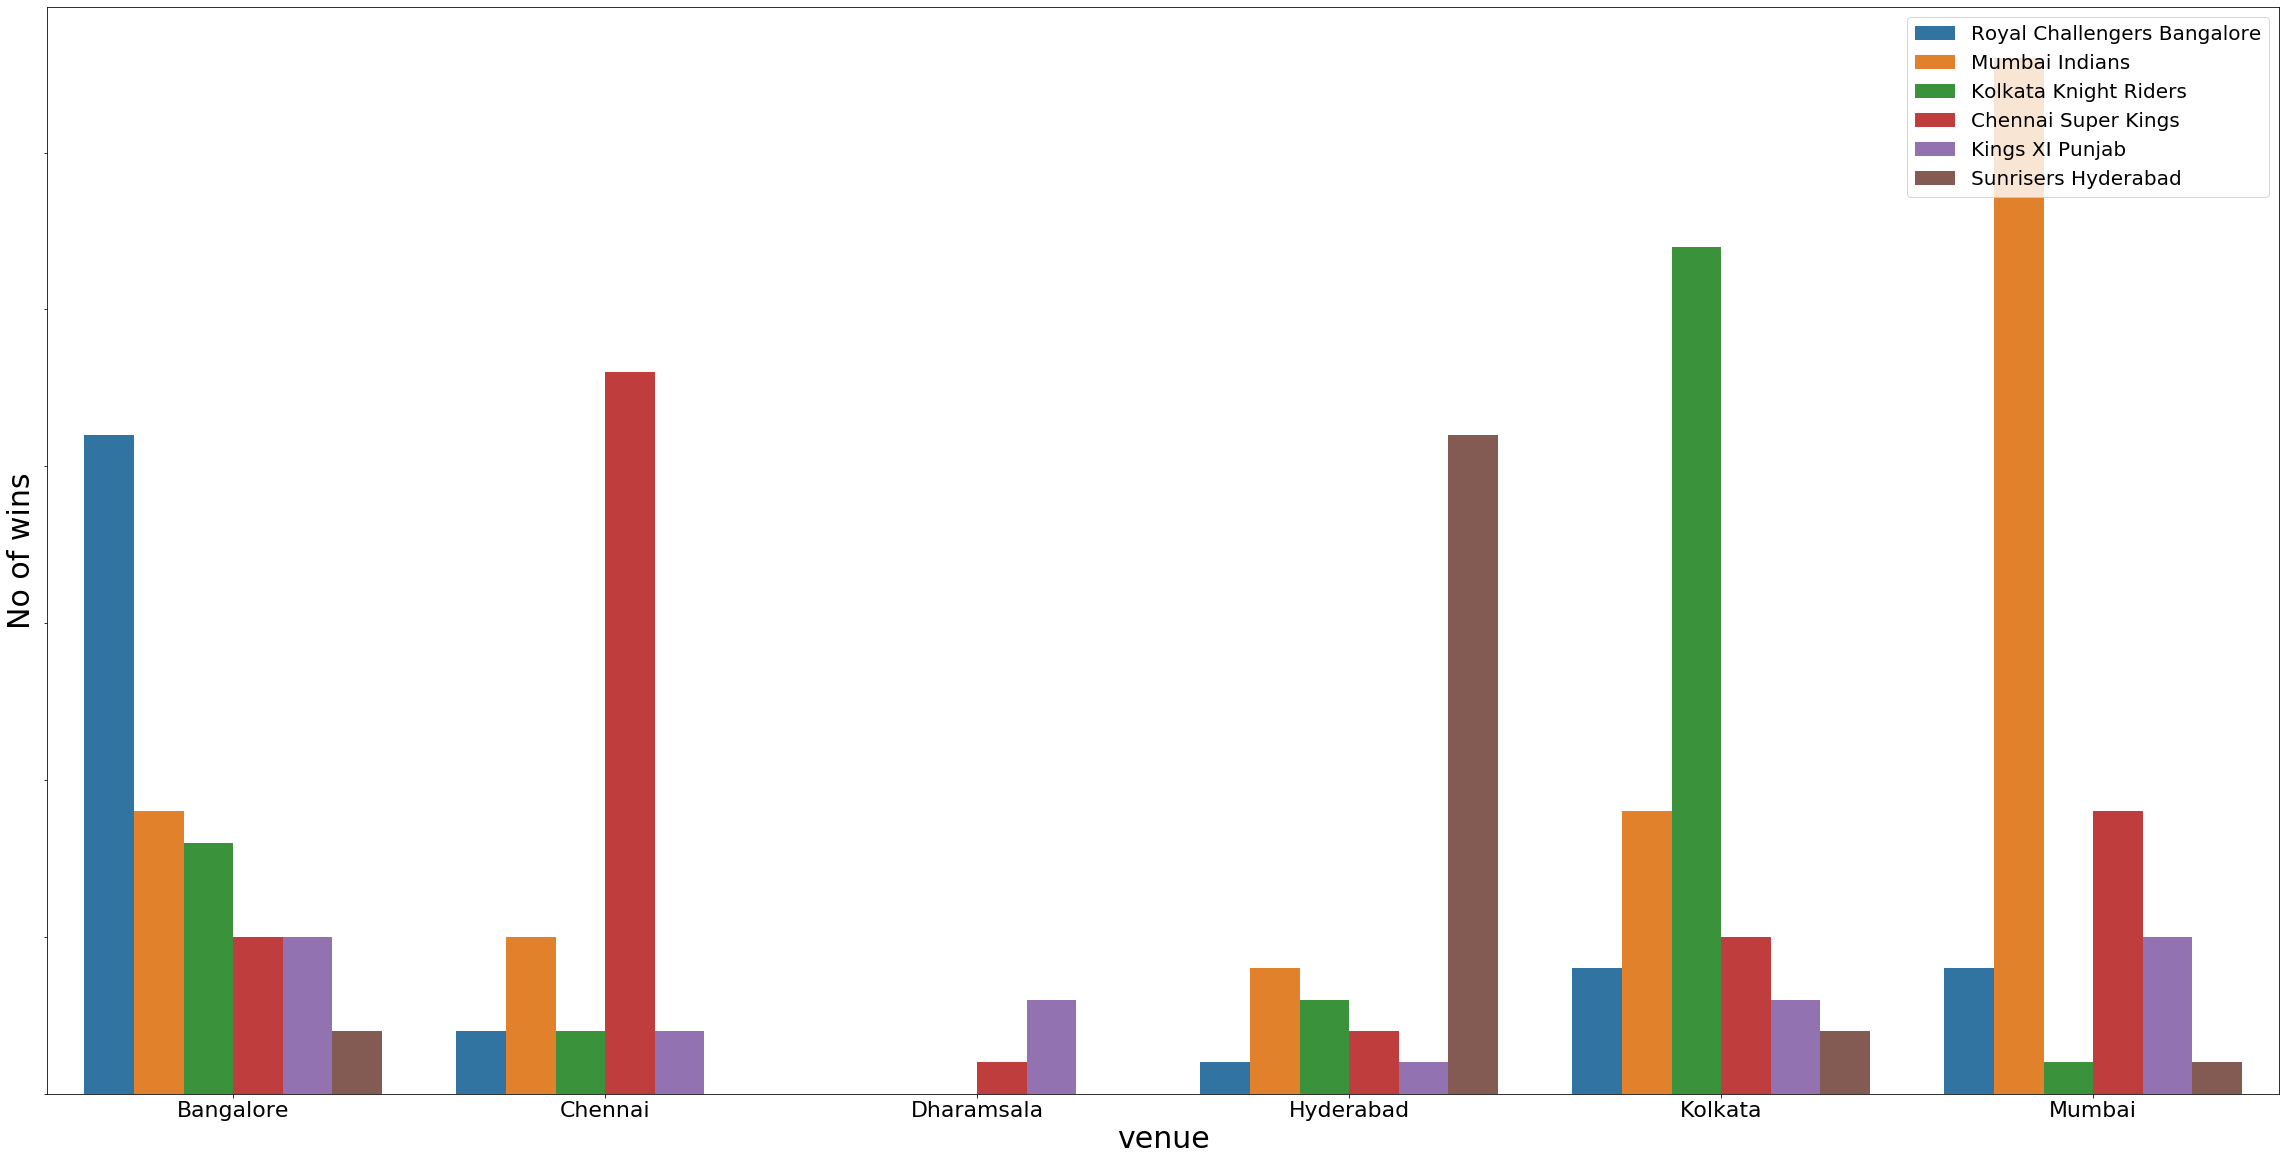

In [16]:
fig, ax = plt.subplots(figsize=(40,20))
city_winner_plot = sns.barplot(x="city", y="count", hue="winner",ax=ax, data=citywise_winner)
city_winner_plot.set_xticklabels(city_winner_plot.get_xmajorticklabels(), fontsize = 22)
city_winner_plot.set_yticklabels(city_winner_plot.get_ymajorticklabels(), fontsize = 22)
plt.legend(loc="upper right", frameon=True, fontsize=20)
plt.xlabel('venue', fontsize=30)
plt.ylabel('No of wins', fontsize=30)
plt.show()

From the above plot, we can see that all the **6** teams have won maximum times at their <u>homegrounds</u> & also we can see that which team performs well <u>except homegrounds</u>.

In [17]:
team_stats = pd.DataFrame({"Total Matches Played":df['team1'].value_counts() + df['team2'].value_counts(), 
                         'Toss Won': df['toss_winner'].value_counts(), 'Total Won': df['winner'].value_counts(),
                         'Total Lost': ((df['team1'].value_counts() + df['team2'].value_counts()) - df['winner'].value_counts()), 
                        "Win %": (df['winner'].value_counts() / (df['team1'].value_counts() + df['team2'].value_counts()))*100})
team_stats = team_stats.sort_values("Win %",ascending=False)
team_stats = team_stats.round(2)
team_stats

,Total Matches Played,Toss Won,Total Won,Total Lost,Win %
Delhi Capitals,16,10,10,6,62.50
Chennai Super Kings,164,89,100,64,60.98
Mumbai Indians,187,98,109,78,58.29
Sunrisers Hyderabad,108,46,58,50,53.70
Kolkata Knight Riders,178,92,92,86,51.69
Rajasthan Royals,147,80,75,72,51.02
Rising Pune Supergiants,30,13,15,15,50.00
Royal Challengers Bangalore,180,81,84,96,46.67
Kings XI Punjab,176,81,82,94,46.59
Gujarat Lions,30,15,13,17,43.33


From above we can say that **Chennai Super Kings** and **Mumbai Indians** are the most successful teams followed by **Kolkata Knight Riders**. 

Now we'll be seeing that at which venue, which is most preferred by toss *winning* team whether **bat** or **bowl**

In [18]:
toss_dec = df.groupby('city')['toss_decision'].value_counts()

In [19]:
toss_dec = toss_dec.reset_index(name='count')

In [20]:
toss_dec.head()

,city,toss_decision,count
0,Abu Dhabi,bat,4
1,Abu Dhabi,field,3
2,Ahmedabad,bat,6
3,Ahmedabad,field,6
4,Bangalore,field,71


In [21]:
toss_dec_pivot = toss_dec.pivot(index ='city', columns ='toss_decision', values =['count'])
toss_dec_pivot = toss_dec_pivot.reset_index(level=[0])
toss_dec_pivot.head()

city count      
toss_decision                 bat field
0                 Abu Dhabi   4.0   3.0
1                 Ahmedabad   6.0   6.0
2                 Bangalore   9.0  71.0
3              Bloemfontein   1.0   1.0
4                 Cape Town   4.0   3.0

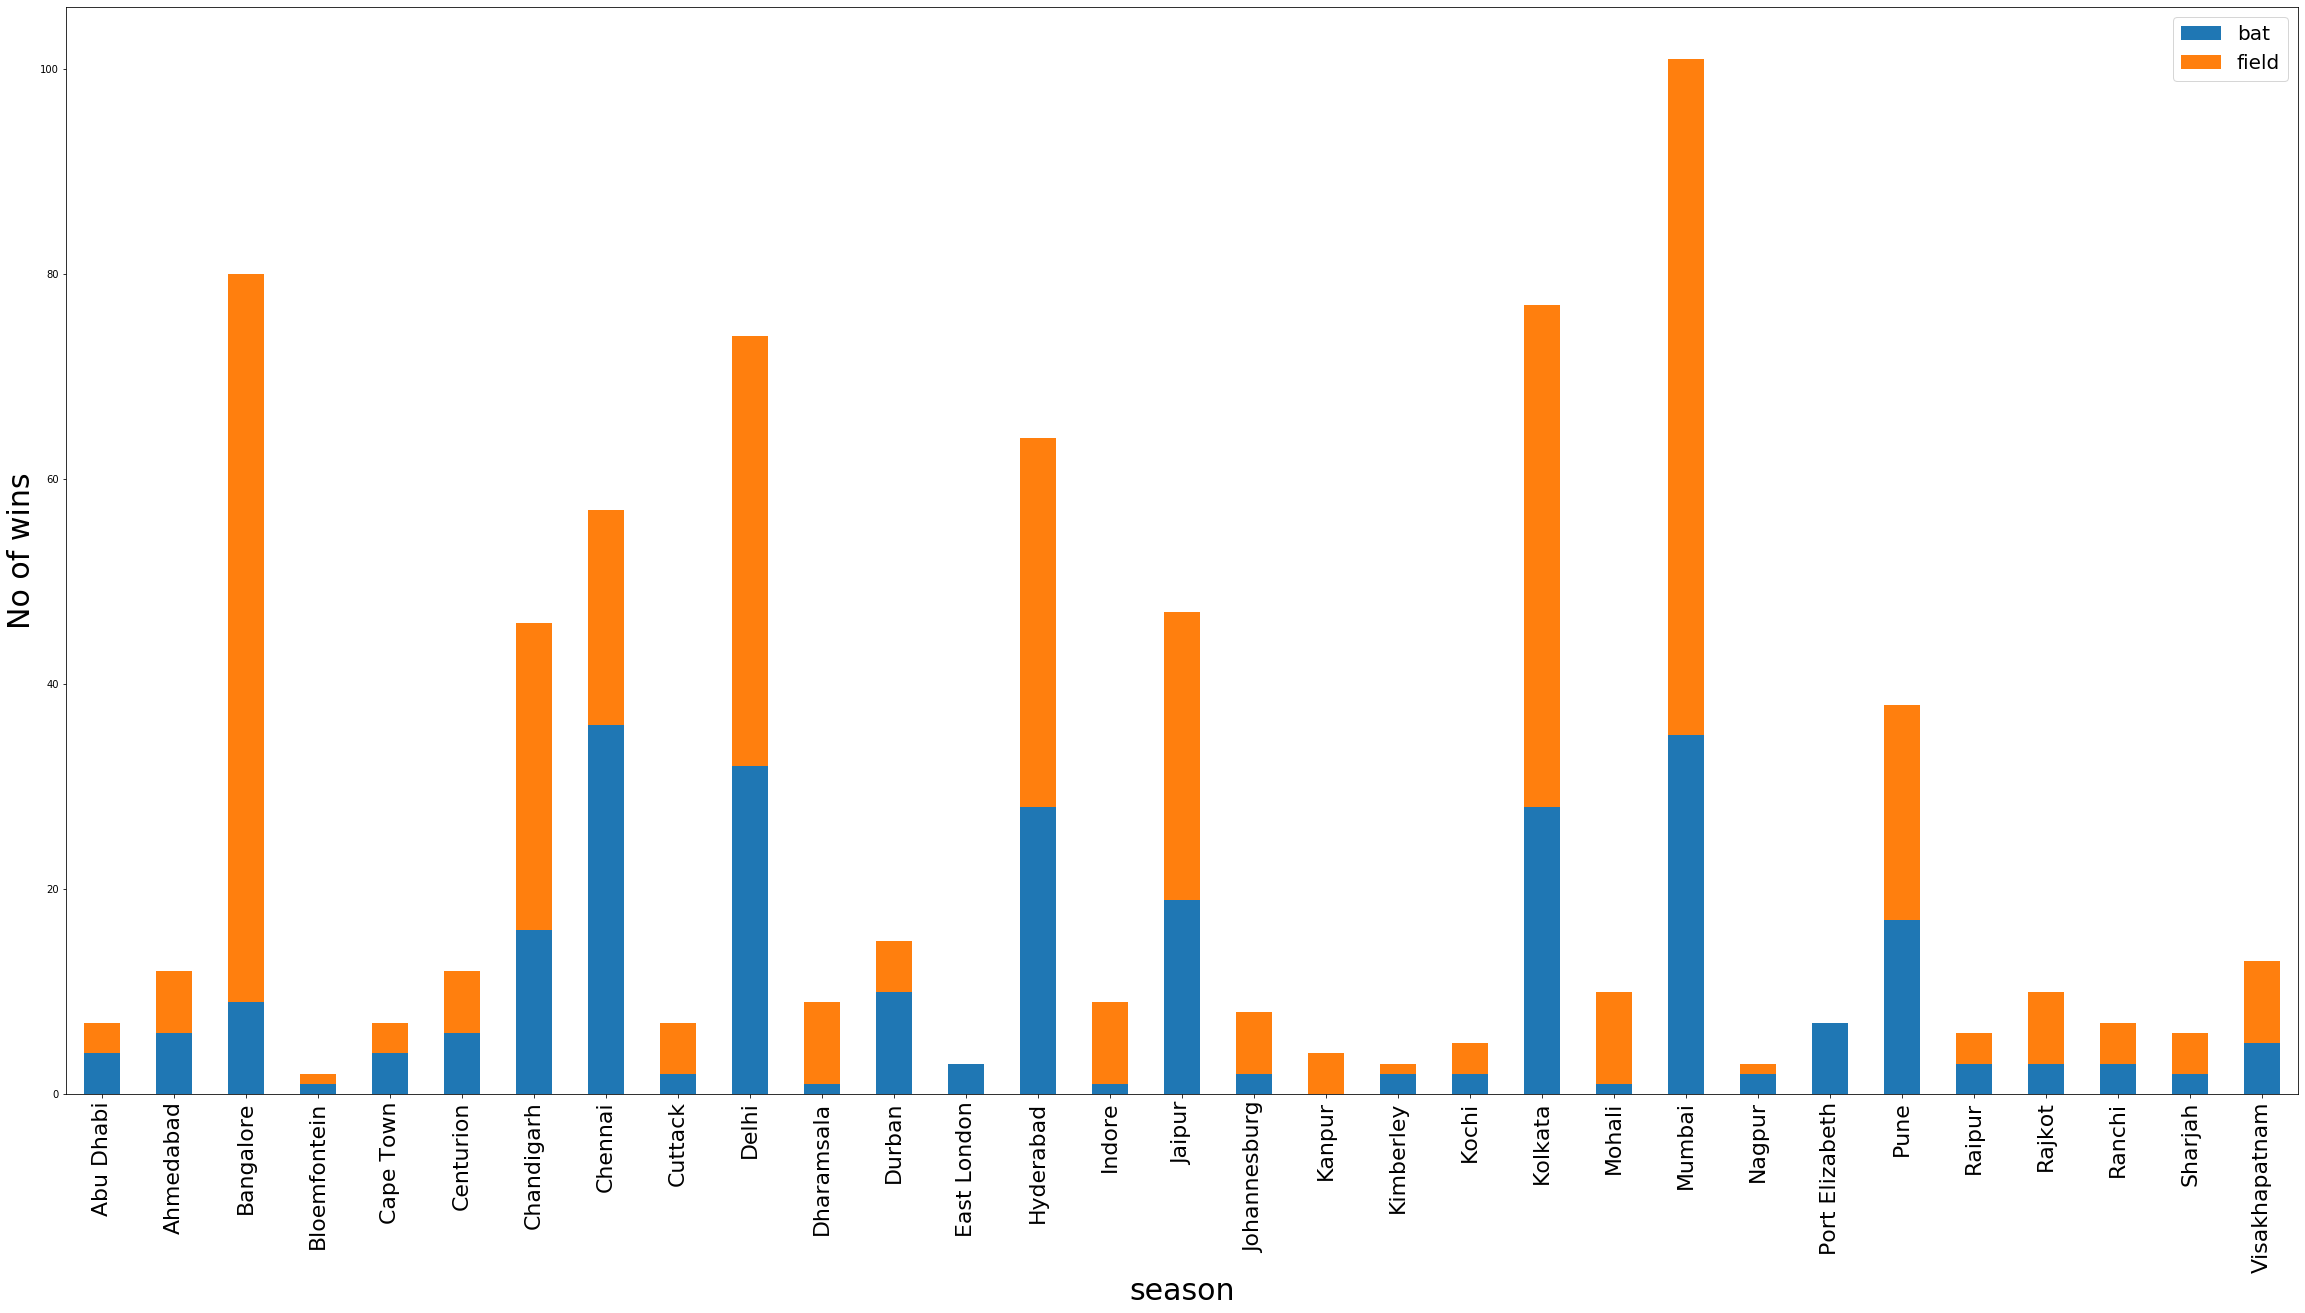

In [22]:
fig, ax = plt.subplots(figsize=(40,20))
toss_plot = toss_dec_pivot.plot(x='city',y = 'count',kind='bar',stacked=True,ax=ax)
toss_plot.set_xticklabels(toss_plot.get_xmajorticklabels(), fontsize = 22)

plt.legend(loc="upper right", frameon=True, fontsize=20)
plt.xlabel('season', fontsize=30)
plt.ylabel('No of wins', fontsize=30)
plt.show()

So from the above plot, we can see that for instance in **Bangalore**, bowling first is more preferred than batting.

Team won by maximum runs

In [23]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

Team won by maximum wickets

In [24]:
df.iloc[df['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

In [25]:
df['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

In [26]:
df.groupby('toss_winner')['winner'].value_counts()

toss_winner          winner                     
Chennai Super Kings  Chennai Super Kings            57
                     Mumbai Indians                  7
                     Kings XI Punjab                 5
                     Royal Challengers Bangalore     5
                     Delhi Daredevils                4
                                                    ..
Sunrisers Hyderabad  Royal Challengers Bangalore     4
                     Rajasthan Royals                2
                     Delhi Capitals                  1
                     Kings XI Punjab                 1
                     Rising Pune Supergiants         1
Name: winner, Length: 118, dtype: int64

In [27]:
df_2 = df[df['team1'].isin(teams) & df['team2'].isin(teams)]
df_2 = df_2.groupby('toss_winner')['winner'].value_counts()
df_2 = df_2.reset_index(name='count')
df_2.shape

(36, 3)

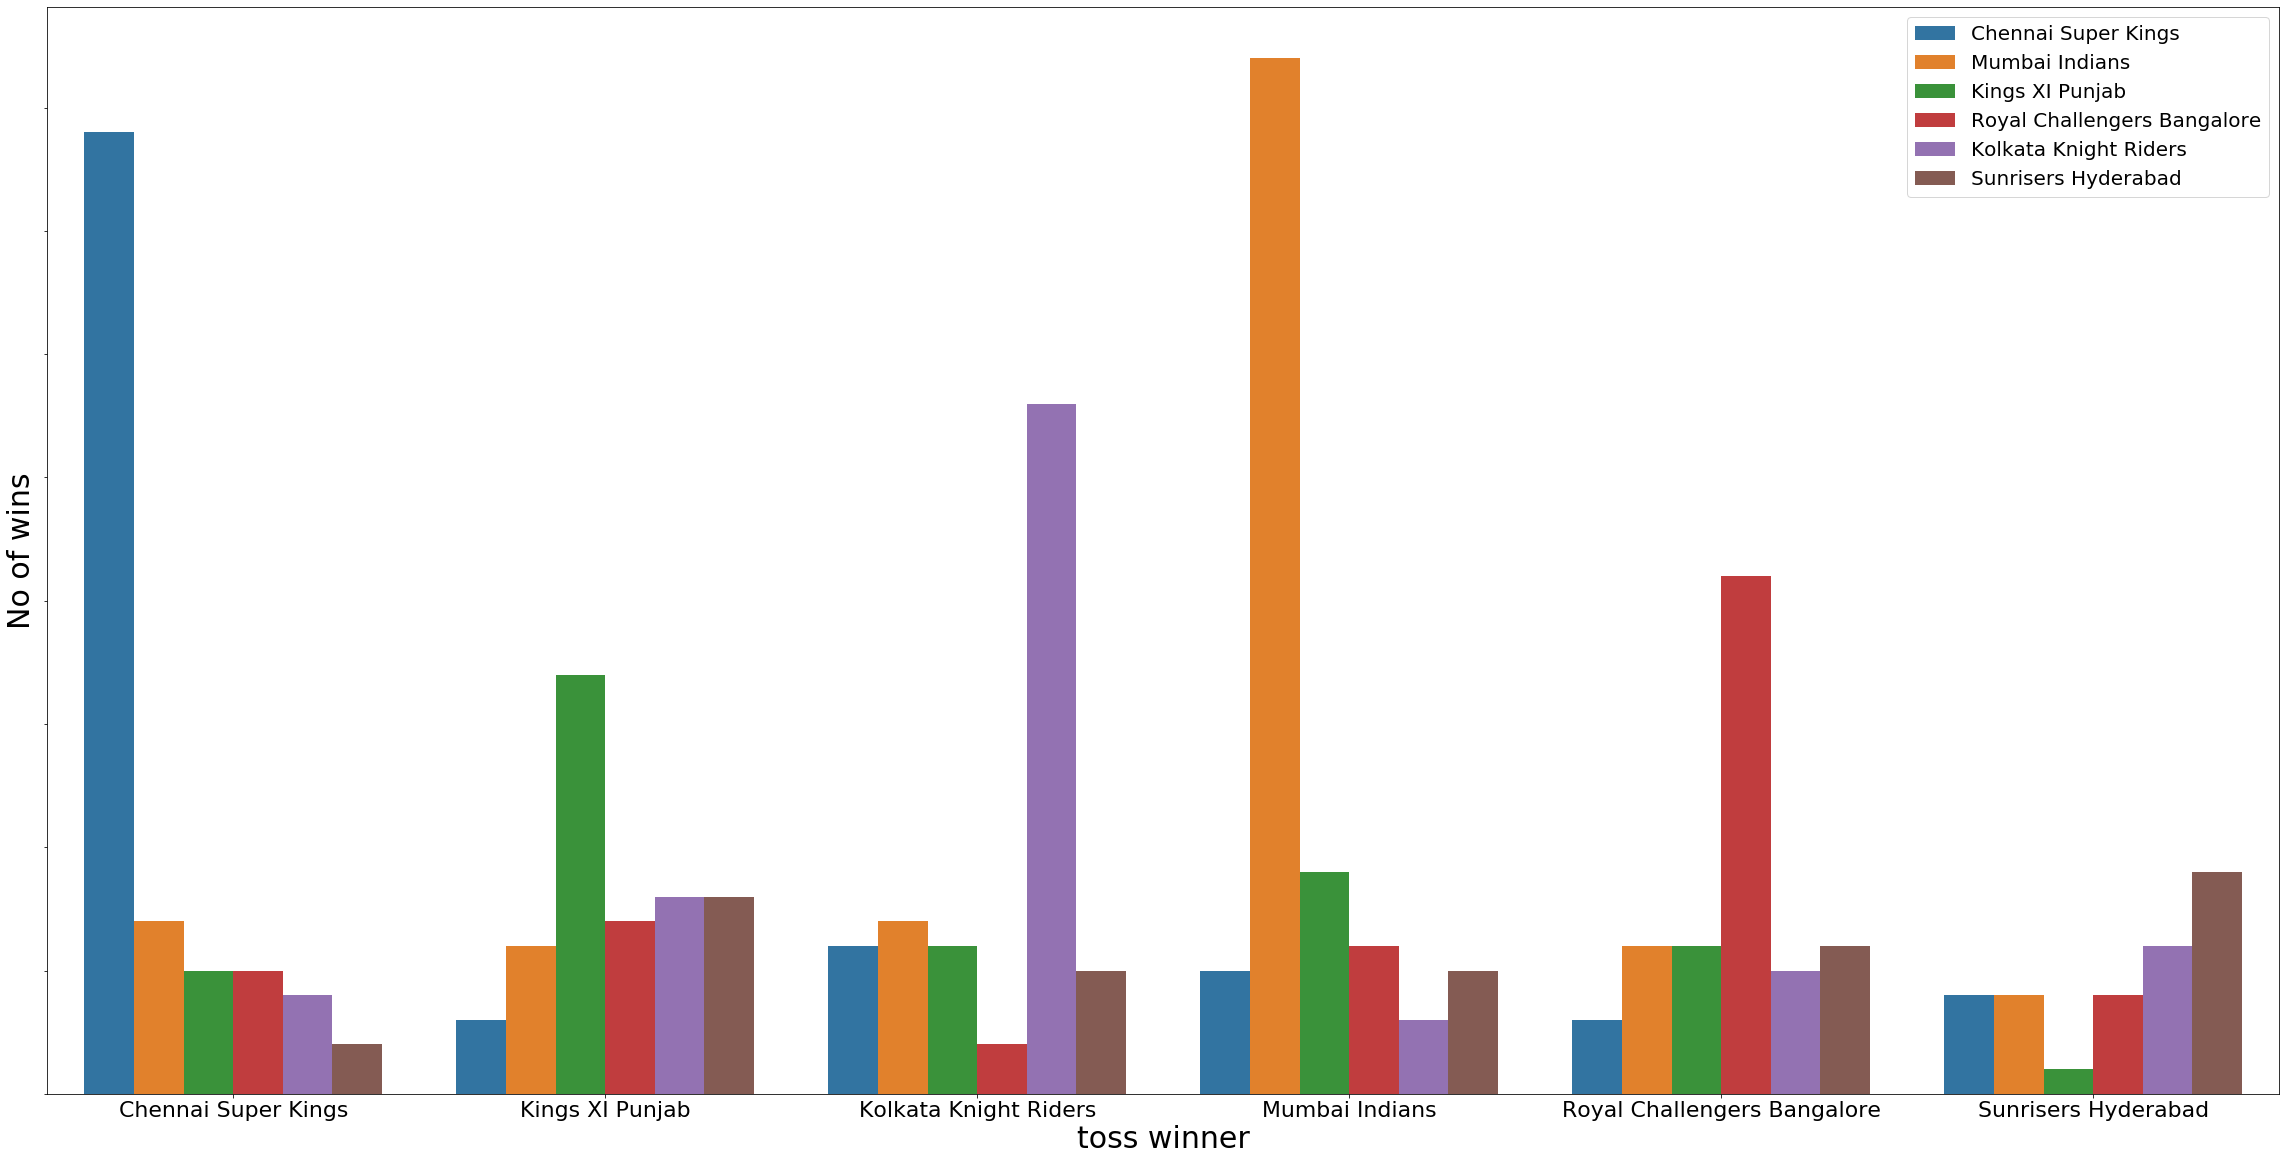

In [28]:
fig, ax = plt.subplots(figsize=(40,20))
toss_win_plot = sns.barplot(x="toss_winner", y="count", hue="winner",ax=ax, data=df_2)
toss_win_plot.set_xticklabels(toss_win_plot.get_xmajorticklabels(), fontsize = 22)
toss_win_plot.set_yticklabels(toss_win_plot.get_ymajorticklabels(), fontsize = 22)
plt.legend(loc="upper right", frameon=True, fontsize=20)
plt.xlabel('toss winner', fontsize=30)
plt.ylabel('No of wins', fontsize=30)
plt.show()

From the above plot, we are able to see that **CSK, MI & KKR** are most likely to win if they win a toss

In [29]:
seasonwise = df.groupby('season')['winner'].value_counts()

In [30]:
seasonwise = seasonwise.reset_index(name='count')

In [31]:
seasonwise.head(10)

,season,winner,count
0,2008,Rajasthan Royals,13
1,2008,Kings XI Punjab,10
2,2008,Chennai Super Kings,9
3,2008,Delhi Daredevils,7
4,2008,Mumbai Indians,7
5,2008,Kolkata Knight Riders,6
6,2008,Royal Challengers Bangalore,4
7,2008,Deccan Chargers,2
8,2009,Delhi Daredevils,10
9,2009,Deccan Chargers,9


In [32]:
seasonwise.shape

(100, 3)

In [33]:
seasonwise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  100 non-null    int64 
 1   winner  100 non-null    object
 2   count   100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [34]:
seasonwise['winner'].unique()

array(['Rajasthan Royals', 'Kings XI Punjab', 'Chennai Super Kings',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Delhi Capitals'],
      dtype=object)

In [35]:
years1 = ['2008','2009','2010','2011','2012','2013']
years2 = ['2014','2015','2016','2017','2018','2019']

In [36]:
seasonwise = seasonwise[seasonwise['winner'].isin(teams)]
seasonwise1 = seasonwise[seasonwise['season'].isin(years1)]
seasonwise2 = seasonwise[seasonwise['season'].isin(years1)]

In [37]:
seasonwise1.shape

(31, 3)

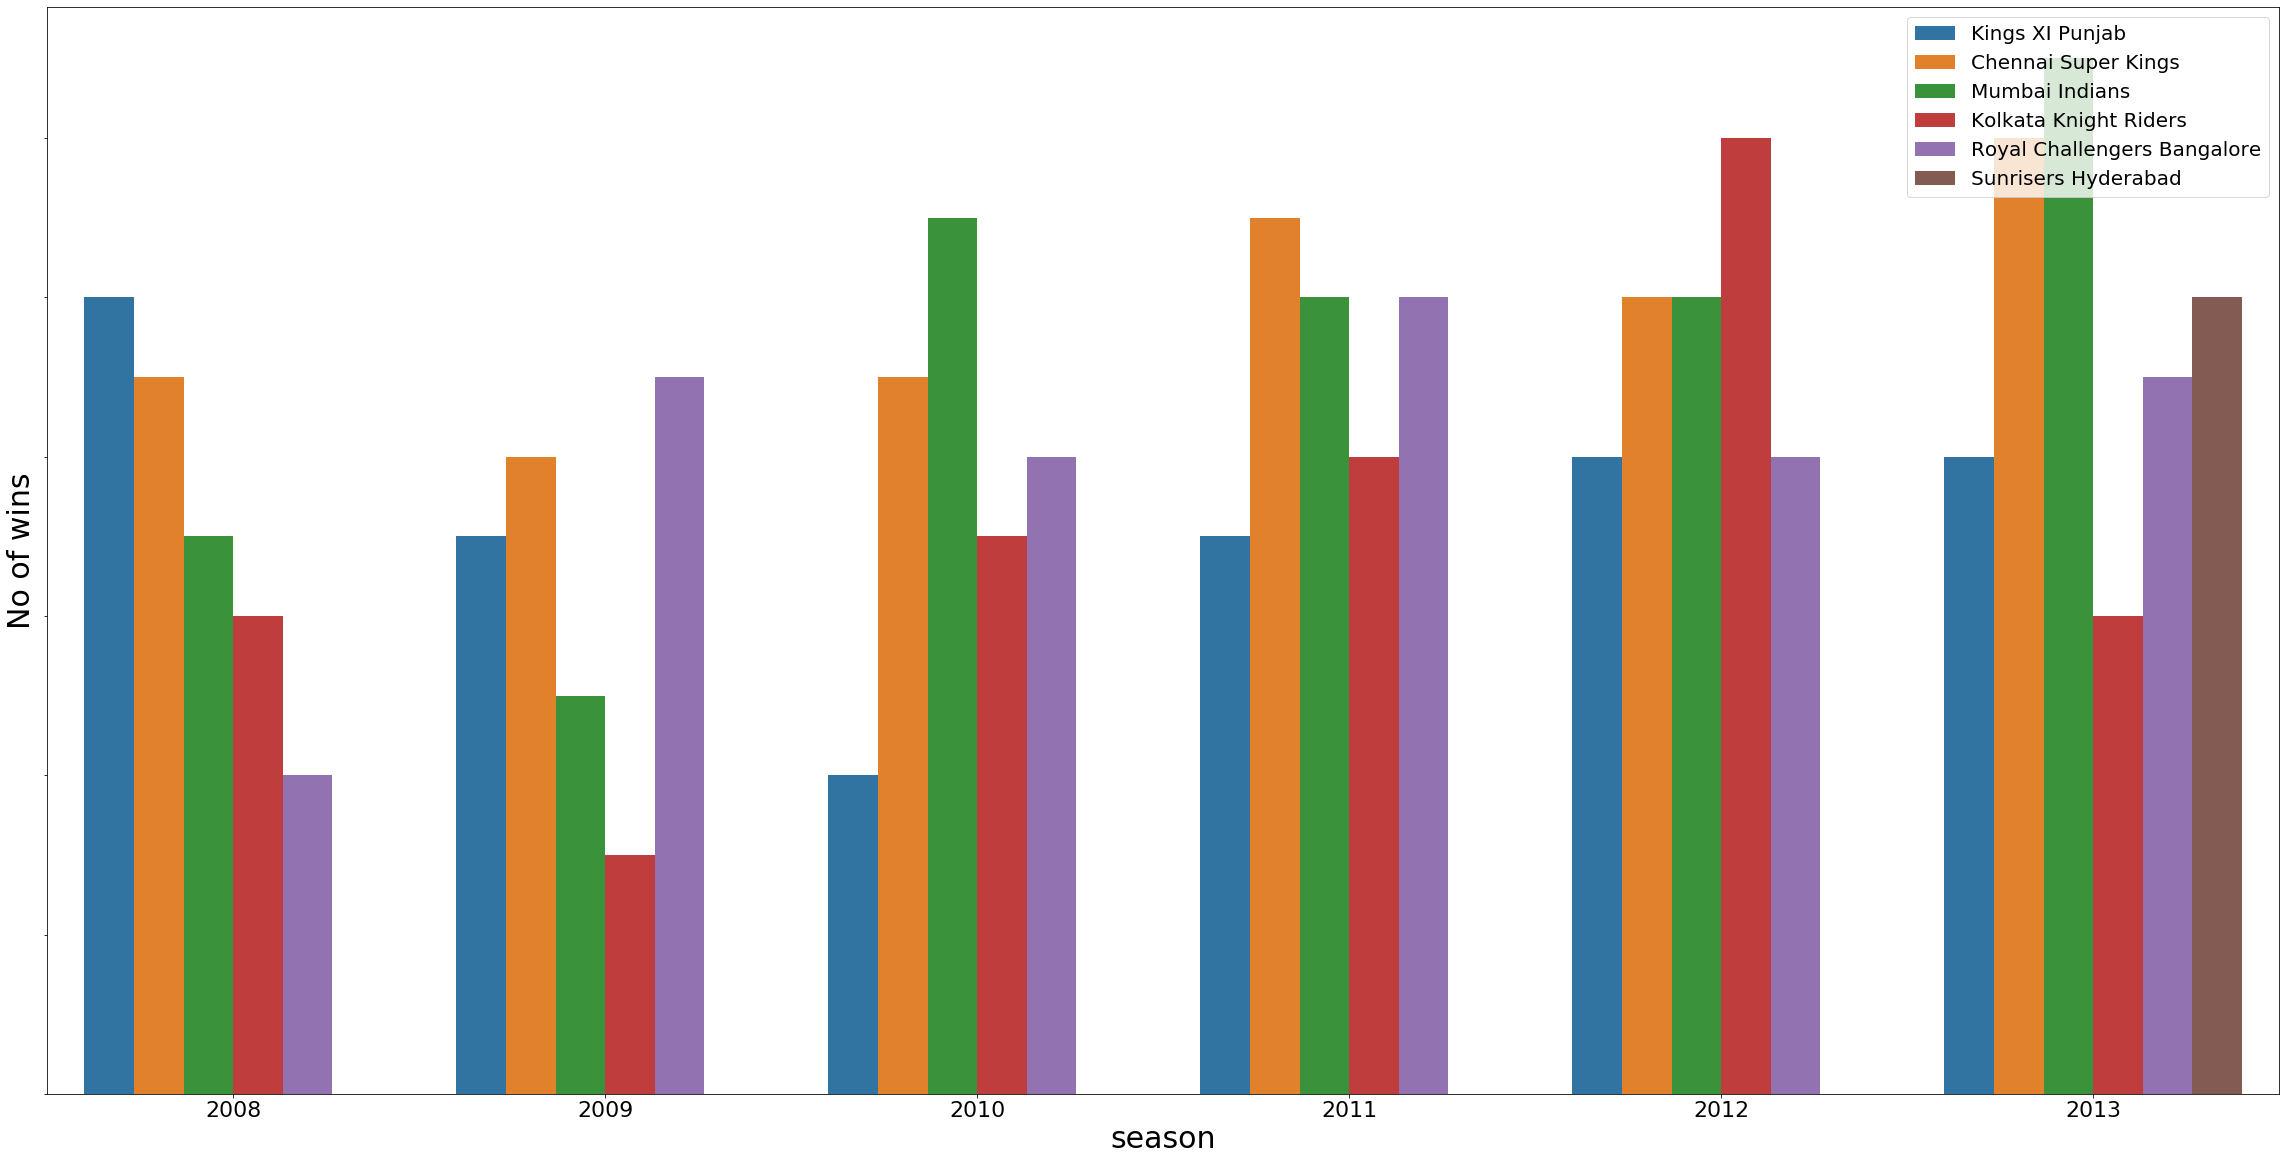

In [38]:
fig, ax = plt.subplots(figsize=(40,20))
res1 = sns.barplot(x="season", y="count", hue="winner",ax=ax, data=seasonwise1)
res1.set_xticklabels(res1.get_xmajorticklabels(), fontsize = 22)
res1.set_yticklabels(res1.get_ymajorticklabels(), fontsize = 22)
plt.legend(loc="upper right", frameon=True, fontsize=20)
plt.xlabel('season', fontsize=30)
plt.ylabel('No of wins', fontsize=30)
plt.show()

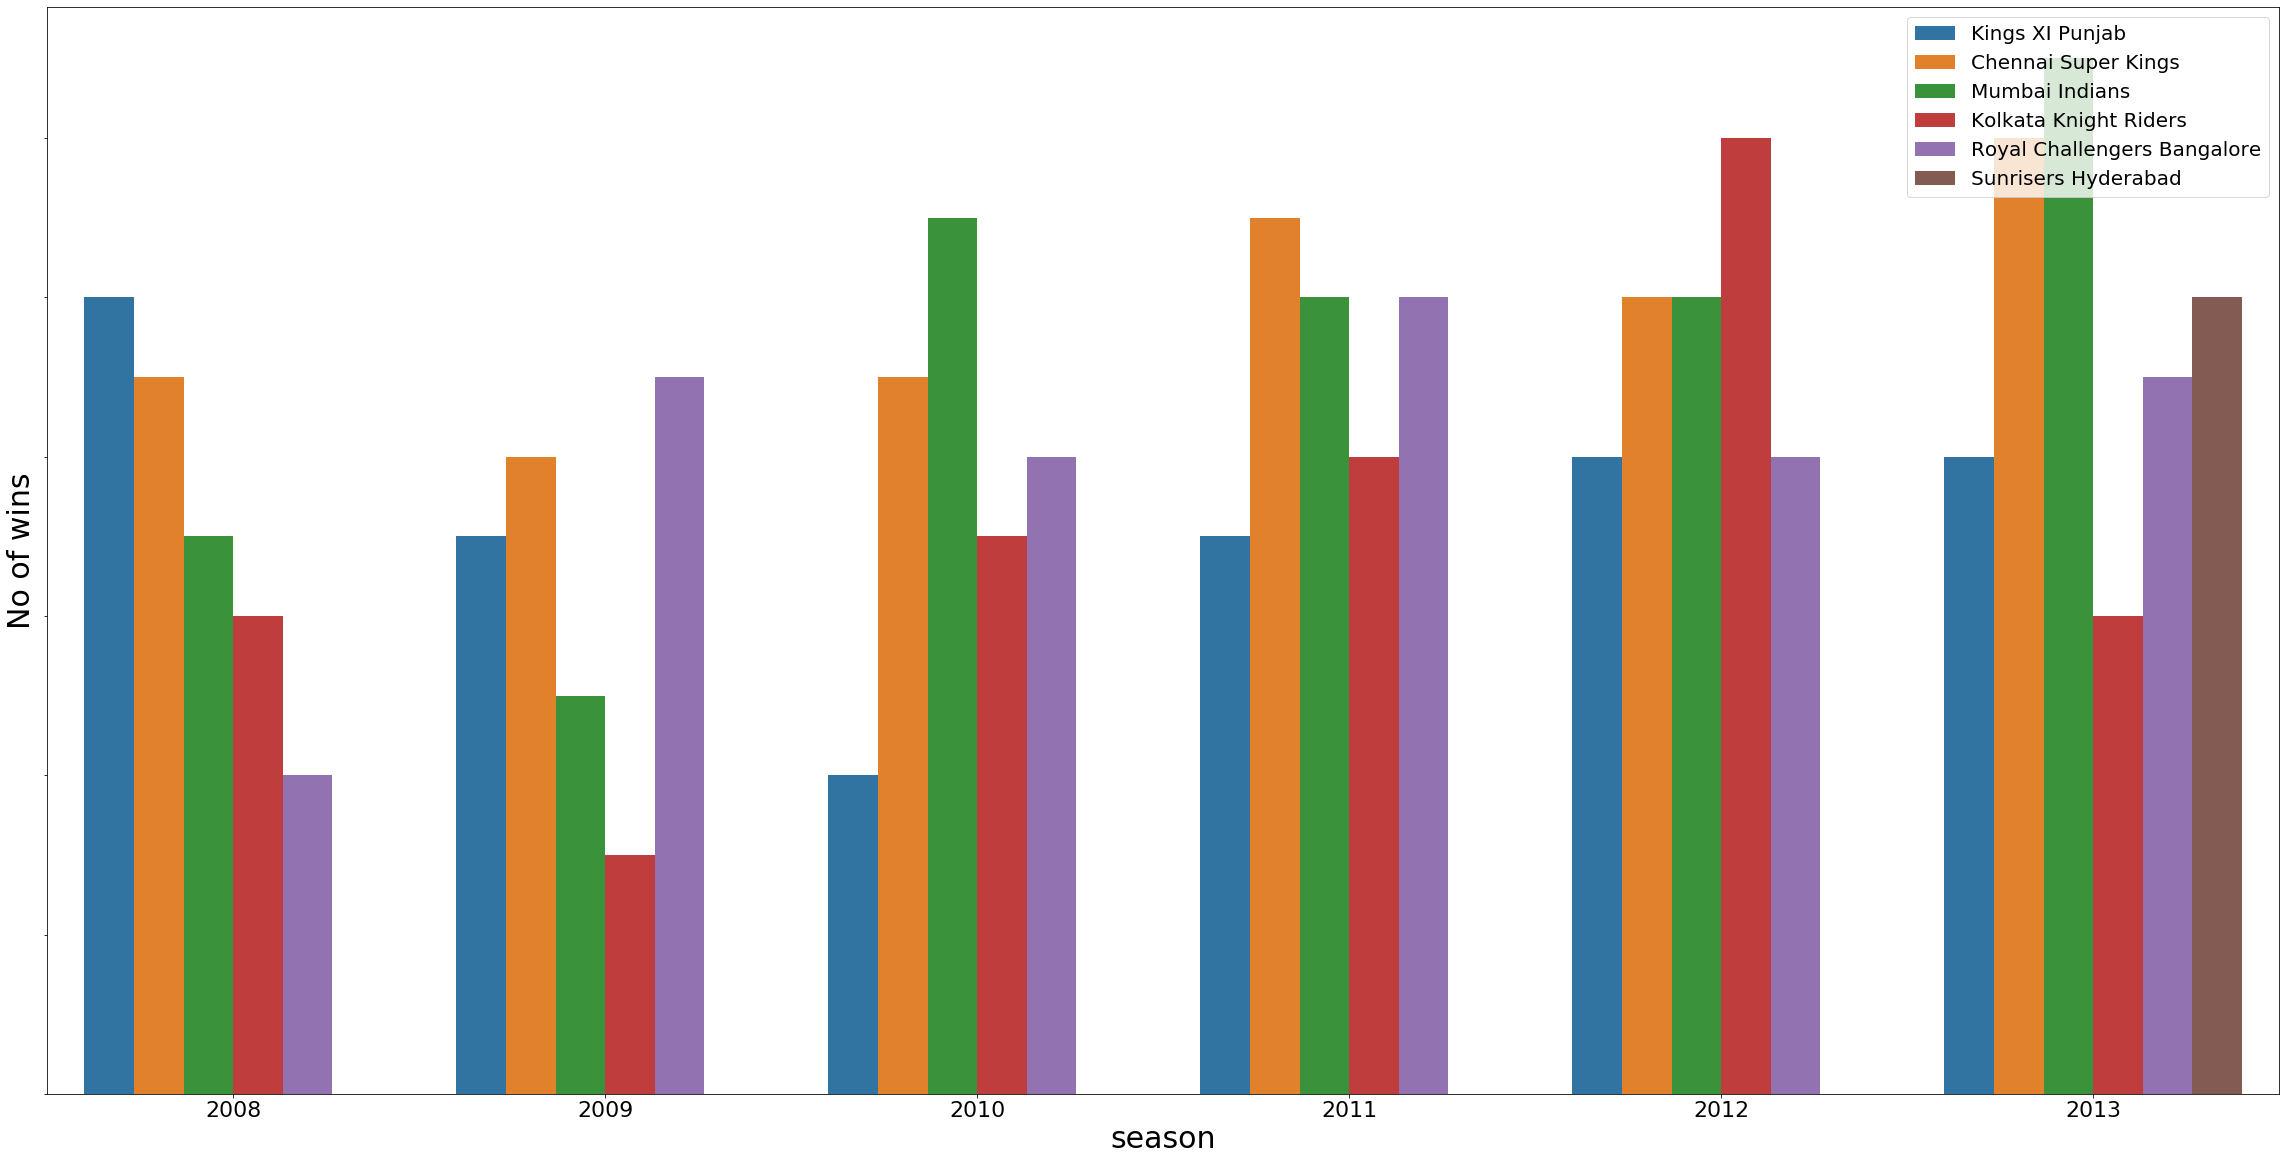

In [39]:
fig, ax = plt.subplots(figsize=(40,20))
res2 = sns.barplot(x="season", y="count", hue="winner",ax=ax, data=seasonwise2)
res2.set_xticklabels(res2.get_xmajorticklabels(), fontsize = 22)
res2.set_yticklabels(res2.get_ymajorticklabels(), fontsize = 22)
plt.xlabel('season', fontsize=30)
plt.ylabel('No of wins', fontsize=30)
plt.legend(loc="upper right", frameon=True, fontsize=20)
plt.show()

From the above plot, we can see the team which won more matches in a particular *season*

In [40]:
df.groupby('winner')['win_by_runs'].sum()

winner
Chennai Super Kings            1778
Deccan Chargers                 421
Delhi Capitals                   92
Delhi Daredevils                675
Gujarat Lions                     1
Kings XI Punjab                 925
Kochi Tuskers Kerala             23
Kolkata Knight Riders          1086
Mumbai Indians                 1866
Pune Warriors                   139
Rajasthan Royals                895
Rising Pune Supergiants         176
Royal Challengers Bangalore    1252
Sunrisers Hyderabad             713
Name: win_by_runs, dtype: int64

In [41]:
a = df.groupby('winner')[['win_by_runs']].sum().index.get_level_values(0).tolist()
d = df.groupby('winner')[['win_by_runs']].sum().reset_index().win_by_runs.values.tolist()

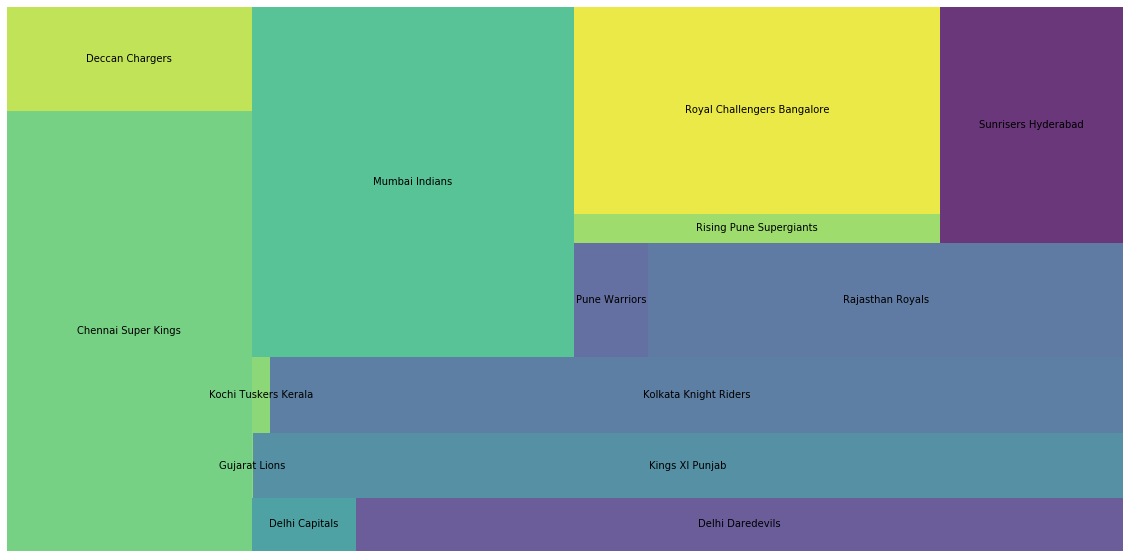

In [42]:
import squarify
fig, ax = plt.subplots(figsize=(20,10))
squarify.plot(sizes=d, label=a, alpha=.8,ax=ax)
plt.axis('off')
plt.show()

From the above **Treemap**, we can see the team with their total win-by-runs. For instance, **Mumbai Indians** has won by maximum runs (total) as compared to other teams.